<a href="https://colab.research.google.com/github/dp22acn/Data_science_Project_Large_Language_model/blob/main/LLM_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Devendra Sai Peddoju**
# Course: MSc Data Science
# Id: 22027731
# Assignment: Large Language Model


# Optimized Implementation of a Transformer-based Model
This notebook demonstrates training a transformer model with unique styling and efficient execution tailored for Colab environments.

In [1]:
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2


In [2]:
!pip install -q transformers datasets optuna evaluate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import datasets
import evaluate

In [4]:


# Import essential libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import evaluate
import optuna
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# Load dataset using the 'datasets' library
data = load_dataset('imdb')  # Example dataset
train_data = data['train'].shuffle(seed=42).select(range(5000))  # Subset for quick runs
test_data = data['test'].shuffle(seed=42).select(range(2000))

# Preprocessing function
def tokenize_data(batch):
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    return tokenizer(batch["text"], padding="max_length", truncation=True)

# Apply tokenizer to dataset
train_data = train_data.map(tokenize_data, batched=True)
test_data = test_data.map(tokenize_data, batched=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

API Key: 5f4d9db7aefc46bf3929f15072919844cc0ca934

Way 1

In [6]:
# Preprocessing function
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_data(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True)

# Apply tokenizer to dataset
train_data = train_data.map(tokenize_data, batched=True)
test_data = test_data.map(tokenize_data, batched=True)

# Set format for PyTorch tensors
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Define the model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="no"
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-6-36597098595a>:41: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wand

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.381600,0.218544,0.920000,0.915842,0.925000,0.920398
2,0.059600,0.311190,0.922500,0.909003,0.939000,0.923758


TrainOutput(global_step=1250, training_loss=0.2596883533358574, metrics={'train_runtime': 1130.8442, 'train_samples_per_second': 8.843, 'train_steps_per_second': 1.105, 'total_flos': 2631110553600000.0, 'train_loss': 0.2596883533358574, 'epoch': 2.0})

Way 2

In [7]:

# Define the model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased"),
    compute_metrics=lambda p: {
        "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
    }
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-7-4d108391578f>:18: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.465000,0.247942,0.920500
2,0.092500,0.308665,0.923500


TrainOutput(global_step=1250, training_loss=0.2681684298157692, metrics={'train_runtime': 1074.9749, 'train_samples_per_second': 9.303, 'train_steps_per_second': 1.163, 'total_flos': 2631110553600000.0, 'train_loss': 0.2681684298157692, 'epoch': 2.0})

In [8]:
# Subset for quick runs (reduce the dataset size)
train_data = data['train'].shuffle(seed=42).select(range(5000))
test_data = data['test'].shuffle(seed=42).select(range(2000))

# Exploratory Data Analysis
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)


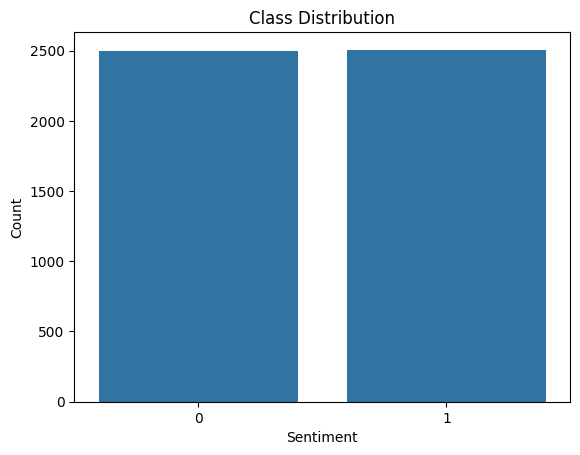

In [9]:
# Class distribution
sns.countplot(data=train_df, x='label')
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

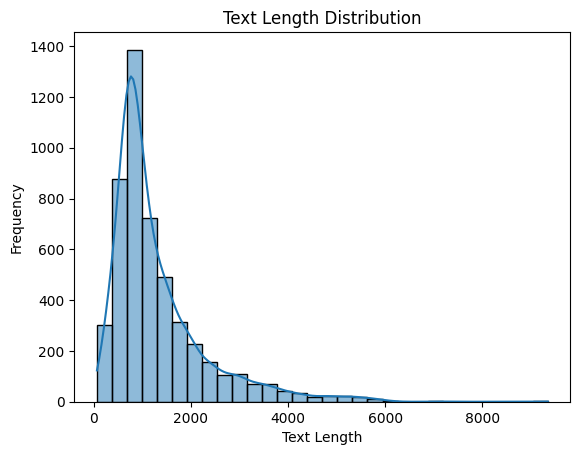

In [10]:
# Text length distribution
train_df['text_length'] = train_df['text'].apply(len)
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

Evaluation Results: {'eval_loss': 0.3086647093296051, 'eval_accuracy': 0.9235, 'eval_runtime': 54.9623, 'eval_samples_per_second': 36.389, 'eval_steps_per_second': 4.549, 'epoch': 2.0}


In [12]:
from transformers import AutoTokenizer

# Assuming you have a pre-trained model and tokenizer
model_name = "bert-base-uncased"  # Replace with your model name
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Preprocess the test data
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Apply the preprocessing function to the test data
test_data = test_data.map(preprocess_function, batched=True)

# Now, predict using the processed data
predictions = trainer.predict(test_data)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

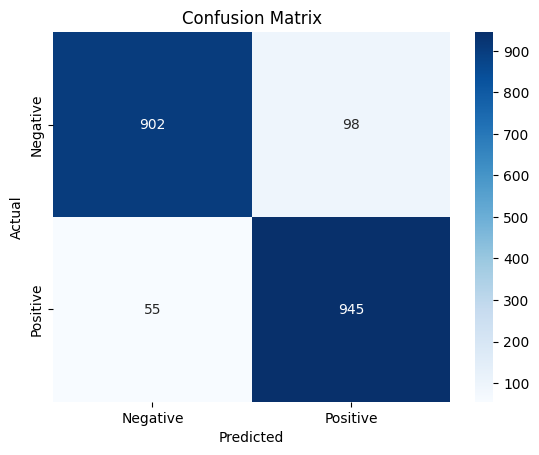

In [13]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Hyper tuning

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-15-c3a09d8ef451>:46: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.409200,0.230391,0.921500,0.920239,0.923000,0.921618
2,0.079000,0.313095,0.923000,0.903626,0.947000,0.924805


[I 2024-11-28 01:17:25,534] A new study created in memory with name: no-name-dd11a48e-ddfb-4321-ac1e-38f1eea727c4
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-15-c3a09d8ef451>:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 0.6735, 'grad_norm': 13.763123512268066, 'learning_rate': 1.6310365172821382e-05, 'epoch': 0.008}
{'loss': 0.7237, 'grad_norm': 38.91452407836914, 'learning_rate': 1.6284226767095707e-05, 'epoch': 0.016}
{'loss': 0.6688, 'grad_norm': 20.331090927124023, 'learning_rate': 1.6258088361370032e-05, 'epoch': 0.024}
{'loss': 0.6691, 'grad_norm': 11.222973823547363, 'learning_rate': 1.6231949955644357e-05, 'epoch': 0.032}
{'loss': 0.6855, 'grad_norm': 14.108823776245117, 'learning_rate': 1.6205811549918682e-05, 'epoch': 0.04}
{'loss': 0.6492, 'grad_norm': 15.564838409423828, 'learning_rate': 1.6179673144193004e-05, 'epoch': 0.048}
{'loss': 0.5381, 'grad_norm': 12.070552825927734, 'learning_rate': 1.6153534738467332e-05, 'epoch': 0.056}
{'loss': 0.4726, 'grad_norm': 6.64914083480835, 'learning_rate': 1.6127396332741653e-05, 'epoch': 0.064}
{'loss': 0.5466, 'grad_norm': 9.558082580566406, 'learning_rate': 1.610125792701598e-05, 'epoch': 0.072}
{'loss': 0.5505, 'grad_norm': 14.7865333557

[I 2024-11-28 02:05:32,991] Trial 0 finished with value: 0.919 and parameters: {'learning_rate': 1.6336503578547057e-05, 'batch_size': 4, 'num_train_epochs': 5, 'weight_decay': 0.03388653862389276}. Best is trial 0 with value: 0.919.


{'eval_loss': 0.5584858655929565, 'eval_accuracy': 0.919, 'eval_precision': 0.9124015748031497, 'eval_recall': 0.927, 'eval_f1': 0.9196428571428571, 'eval_runtime': 60.0935, 'eval_samples_per_second': 33.281, 'eval_steps_per_second': 8.32, 'epoch': 5.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-15-c3a09d8ef451>:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 0.7245, 'grad_norm': 6.9003825187683105, 'learning_rate': 9.188901021925808e-05, 'epoch': 0.008}
{'loss': 0.6474, 'grad_norm': 4.353236198425293, 'learning_rate': 9.170486390619344e-05, 'epoch': 0.016}
{'loss': 0.703, 'grad_norm': 3.2698419094085693, 'learning_rate': 9.152071759312879e-05, 'epoch': 0.024}
{'loss': 0.7166, 'grad_norm': 3.849614381790161, 'learning_rate': 9.133657128006416e-05, 'epoch': 0.032}
{'loss': 0.6211, 'grad_norm': 5.884393692016602, 'learning_rate': 9.115242496699951e-05, 'epoch': 0.04}
{'loss': 0.7991, 'grad_norm': 10.112336158752441, 'learning_rate': 9.096827865393486e-05, 'epoch': 0.048}
{'loss': 0.6425, 'grad_norm': 5.260283946990967, 'learning_rate': 9.078413234087021e-05, 'epoch': 0.056}
{'loss': 0.6458, 'grad_norm': 24.886905670166016, 'learning_rate': 9.059998602780557e-05, 'epoch': 0.064}
{'loss': 0.9609, 'grad_norm': 8.61870002746582, 'learning_rate': 9.041583971474092e-05, 'epoch': 0.072}
{'loss': 0.7051, 'grad_norm': 6.781850337982178, 'lear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.6950740218162537, 'eval_accuracy': 0.5, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_runtime': 56.821, 'eval_samples_per_second': 35.198, 'eval_steps_per_second': 8.8, 'epoch': 3.0}
{'loss': 0.656, 'grad_norm': 14.084853172302246, 'learning_rate': 2.283414282001604e-05, 'epoch': 3.008}
{'loss': 0.7334, 'grad_norm': 3.9133753776550293, 'learning_rate': 2.264999650695139e-05, 'epoch': 3.016}
{'loss': 0.691, 'grad_norm': 9.165058135986328, 'learning_rate': 2.2465850193886747e-05, 'epoch': 3.024}
{'loss': 0.7088, 'grad_norm': 10.062755584716797, 'learning_rate': 2.22817038808221e-05, 'epoch': 3.032}
{'loss': 0.6962, 'grad_norm': 2.895451784133911, 'learning_rate': 2.2097557567757456e-05, 'epoch': 3.04}
{'loss': 0.7187, 'grad_norm': 3.2556169033050537, 'learning_rate': 2.1913411254692808e-05, 'epoch': 3.048}
{'loss': 0.6905, 'grad_norm': 9.686681747436523, 'learning_rate': 2.1729264941628164e-05, 'epoch': 3.056}
{'loss': 0.7186, 'grad_norm': 17.6122055053

[I 2024-11-28 02:43:53,839] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 9.207315653232273e-05, 'batch_size': 4, 'num_train_epochs': 4, 'weight_decay': 0.2720698303718345}. Best is trial 0 with value: 0.919.


{'eval_loss': 0.6940209865570068, 'eval_accuracy': 0.5, 'eval_precision': 0.5, 'eval_recall': 1.0, 'eval_f1': 0.6666666666666666, 'eval_runtime': 56.8285, 'eval_samples_per_second': 35.194, 'eval_steps_per_second': 8.798, 'epoch': 4.0}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-15-c3a09d8ef451>:85: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'loss': 0.6778, 'grad_norm': 3.4457194805145264, 'learning_rate': 1.1131495706507377e-05, 'epoch': 0.016}
{'loss': 0.6618, 'grad_norm': 3.41623592376709, 'learning_rate': 1.1095760567802699e-05, 'epoch': 0.032}
{'loss': 0.6445, 'grad_norm': 3.470346212387085, 'learning_rate': 1.106002542909802e-05, 'epoch': 0.048}
{'loss': 0.5659, 'grad_norm': 6.815843105316162, 'learning_rate': 1.1024290290393342e-05, 'epoch': 0.064}
{'loss': 0.5455, 'grad_norm': 8.629884719848633, 'learning_rate': 1.0988555151688663e-05, 'epoch': 0.08}
{'loss': 0.4884, 'grad_norm': 6.682818412780762, 'learning_rate': 1.0952820012983984e-05, 'epoch': 0.096}
{'loss': 0.4138, 'grad_norm': 7.083056926727295, 'learning_rate': 1.0917084874279306e-05, 'epoch': 0.112}
{'loss': 0.5035, 'grad_norm': 5.950012683868408, 'learning_rate': 1.0881349735574627e-05, 'epoch': 0.128}
{'loss': 0.3322, 'grad_norm': 7.710326194763184, 'learning_rate': 1.0845614596869949e-05, 'epoch': 0.144}
{'loss': 0.3609, 'grad_norm': 17.2347354888916, 

[I 2024-11-28 03:28:00,067] Trial 2 finished with value: 0.919 and parameters: {'learning_rate': 1.1167230845212056e-05, 'batch_size': 8, 'num_train_epochs': 5, 'weight_decay': 0.14112259973465538}. Best is trial 0 with value: 0.919.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'eval_loss': 0.43298983573913574, 'eval_accuracy': 0.919, 'eval_precision': 0.9060077519379846, 'eval_recall': 0.935, 'eval_f1': 0.9202755905511811, 'eval_runtime': 54.859, 'eval_samples_per_second': 36.457, 'eval_steps_per_second': 4.557, 'epoch': 5.0}
Best hyperparameters: {'learning_rate': 1.6336503578547057e-05, 'batch_size': 4, 'num_train_epochs': 5, 'weight_decay': 0.03388653862389276}


<ipython-input-15-c3a09d8ef451>:122: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.198900,0.328896,0.909000,0.867806,0.965000,0.913826
2,0.012100,0.467414,0.917500,0.898758,0.941000,0.919394
3,0.326200,0.456054,0.925500,0.926780,0.924000,0.925388
4,0.000400,0.611021,0.911000,0.880556,0.951000,0.914423
5,0.000400,0.599562,0.918000,0.902697,0.937000,0.919529


Final Evaluation Results: {'eval_loss': 0.5995621681213379, 'eval_accuracy': 0.918, 'eval_precision': 0.9026974951830443, 'eval_recall': 0.937, 'eval_f1': 0.9195289499509323, 'eval_runtime': 60.3036, 'eval_samples_per_second': 33.166, 'eval_steps_per_second': 8.291, 'epoch': 5.0}


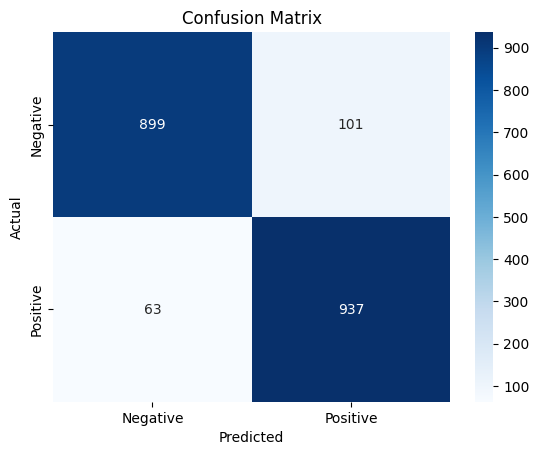

In [15]:
# Load dataset using the 'datasets' library
data = load_dataset('imdb')  # Example dataset
train_data = data['train'].shuffle(seed=42).select(range(5000))  # Subset for quick runs
test_data = data['test'].shuffle(seed=42).select(range(2000))

# Preprocessing function
def tokenize_data(batch):
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    return tokenizer(batch["text"], padding="max_length", truncation=True)

# Apply tokenizer to dataset
train_data = train_data.map(tokenize_data, batched=True)
test_data = test_data.map(tokenize_data, batched=True)

# Set format for PyTorch tensors
train_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_data.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Define model
model_name = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="no"
)

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=AutoTokenizer.from_pretrained(model_name),
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Hyperparameter tuning with Optuna
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 5e-4, log=True)
    batch_size = trial.suggest_categorical('batch_size', [4, 8])
    num_train_epochs = trial.suggest_int('num_train_epochs', 2 ,5)
    weight_decay = trial.suggest_float('weight_decay', 0.0, 0.3)

    # Training arguments for hyperparameter tuning
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        logging_dir='./logs',
        logging_steps=10,
        save_strategy="no",
        disable_tqdm=True
    )

    # Model for the tuning process
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Trainer for hyperparameter tuning
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_data,
        eval_dataset=test_data,
        tokenizer=AutoTokenizer.from_pretrained(model_name),
        compute_metrics=compute_metrics
    )

    # Train and evaluate
    trainer.train()
    eval_results = trainer.evaluate()
    return eval_results["eval_accuracy"]

# Hyperparameter tuning with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)

# Best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best hyperparameters
best_params = study.best_params
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=best_params['learning_rate'],
    per_device_train_batch_size=best_params['batch_size'],
    per_device_eval_batch_size=best_params['batch_size'],
    num_train_epochs=best_params['num_train_epochs'],
    weight_decay=best_params['weight_decay'],
    logging_dir='./logs',
    logging_steps=4
)

# Final model training with the best parameters
final_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
trainer = Trainer(
    model=final_model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=AutoTokenizer.from_pretrained(model_name),
    compute_metrics=compute_metrics
)

trainer.train()
final_results = trainer.evaluate()
print("Final Evaluation Results:", final_results)

# Plot confusion matrix
predictions = trainer.predict(test_data)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

conf_matrix = confusion_matrix(true_labels, pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()